Libraries:

In [71]:
# Thêm các thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [2]:
# Lấy dữ liệu từ Data
url = "../../../Data/number_of_deaths_processed_data.csv"

# Đọc file 
deaths = pd.read_csv(url)
deaths

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


***PREDICT TỔNG SỐ CA TỬ VONG TOÀN CẦU***

Chia ra label và feature
- Label: Injuries - số ca tử vong do chấn thương
- Features: các nguyên do khác

In [3]:
# X là DataFrame chứa các features sau khi loại bỏ cột Injuries
X = deaths.drop(columns = 'Injuries')

# Y chứa label Injuries
Y = deaths['Injuries']

# Cột CountryName thường không thể dùng trực tiếp trong mô hình máy học do giá trị chuỗi 
# nên được mã hóa sang dạng số sử dụng LabelEncoder từ thư viện sklearn
LE = LabelEncoder()
X['CountryName'] = LE.fit_transform(X['CountryName'])

Tạo train, test set:

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

Khởi tạo model

In [5]:
# Xác định mô hình hồi quy tuyến tính 
LR = LinearRegression()

# Huấn luyện mô hình với dữ liệu huấn luyện đã chia
LR.fit(X_train, Y_train)

LinearRegression()

Dự đoán khi dùng model

In [6]:
# Dự đoán số ca tử vong toàn cầu
total_deaths_pred = LR.predict(X_test)

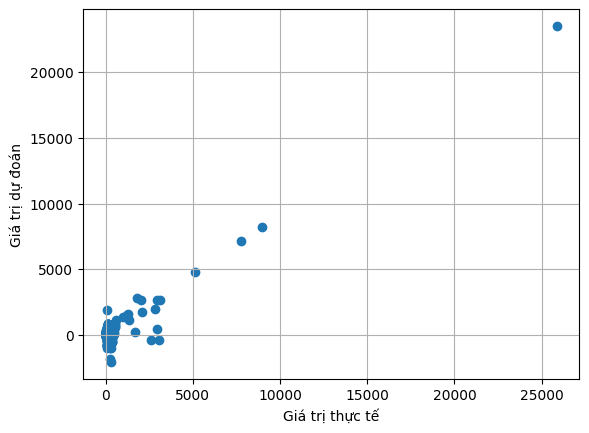

In [70]:
# Biểu đồ của số ca tử vong toàn cầu
plt.scatter(Y_test, total_deaths_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.grid(True)
plt.show()

Đánh giá:

In [8]:
# @title
MSE = mean_squared_error(Y_test, total_deaths_pred)
MSE


61785.42950305886

***DỰ ĐOÁN SỐ CA TỬ VONG CHO TỪNG NGUYÊN NHÂN TRONG NHÓM CÁC NGUYÊN NHÂN CHO HỆ SỐ TƯƠNG QUAN CAO***

In [65]:
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
df_copy = cleaned_df.copy()
df_copy = df_copy.drop(['Year', 'CountryName'], axis='columns')

In [37]:
# Tính ma trận tương quan
correlation_matrix = df_copy.corr()

Tìm các cặp tương quan

In [41]:
# Thiết đặt ngưỡng tương quan
threshold = 0.7

# Liệt kê các cặp có tỷ lệ tương quan vượt ngưỡng
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
#print(high_correlation)
couple = {}

for col in high_correlation:
    correlated_cols = correlation_matrix.index[high_correlation[col]].tolist()
    if len(correlated_cols) > 0:
        couple[col] = correlated_cols
        
print(couple)

{'Prematurity': ['Birth asphyxia and birth trauma', 'Sepsis and other infectious conditions of the newborn', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Birth asphyxia and birth trauma': ['Prematurity', 'Sepsis and other infectious conditions of the newborn', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Sepsis and other infectious conditions of the newborn': ['Prematurity', 'Birth asphyxia and birth trauma', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Congenital anomalies': ['Prematurity', 'Birth asphyxia and birth trauma', 'Sepsis and oth

Xây dựng mô hình

In [79]:
total_predicted_values = 0
for target_col, feature_cols in couple.items():
    # Tạo DataFrame mới chỉ chứa các cột của cặp đã chọn
    selected_df = cleaned_df[[target_col] + feature_cols]

    # Loại bỏ các dòng có giá trị null (nếu có)
    selected_df = selected_df.dropna()

    # Chia dữ liệu thành features (X) và target (y)
    X_couple = selected_df[feature_cols]
    y_couple = selected_df[target_col]

    # Chia dữ liệu thành train và test set
    X_couple_train, X_couple_test, y_couple_train, y_couple_test = train_test_split(X_couple, y_couple, test_size=0.2, random_state=42)

    # Khởi tạo và huấn luyện mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_couple_train, y_couple_train)
    
    # Dự đoán số ca tử vong
    predicted_values = model.predict(X_couple_test)
    
    # Sử dụng cross-validation để xác thực siêu tham số
    scores = cross_val_score(model, X_couple_train, y_couple_train, cv=5, scoring='neg_mean_squared_error')
    
    # Đánh giá hiệu suất mô hình
    mean_mse = -scores.mean()  # Mean Squared Error
    root_mean_mse = np.sqrt(mean_mse)  # Root Mean Squared Error

    # Báo cáo quy trình tinh chỉnh mô hình
    print(f"Độ lỗi bình phương trung bình: {mean_mse}")
    print(f"Căn bậc hai độ lỗi bình phương trung bình : {root_mean_mse}")
    
    # Tính tổng dự đoán từ tất cả các cặp
    total_predicted_values += sum(predicted_values)

Độ lỗi bình phương trung bình: 2649748.2946545742
Căn bậc hai độ lỗi bình phương trung bình : 1627.8047470917925
Độ lỗi bình phương trung bình: 1129867.2852947796
Căn bậc hai độ lỗi bình phương trung bình : 1062.9521556941213
Độ lỗi bình phương trung bình: 693913.0775933008
Căn bậc hai độ lỗi bình phương trung bình : 833.0144522115453
Độ lỗi bình phương trung bình: 860893.210122503
Căn bậc hai độ lỗi bình phương trung bình : 927.8433111913363
Độ lỗi bình phương trung bình: 617552.3802870552
Căn bậc hai độ lỗi bình phương trung bình : 785.8450103468591
Độ lỗi bình phương trung bình: 13256.092582956693
Căn bậc hai độ lỗi bình phương trung bình : 115.13510577993443
Độ lỗi bình phương trung bình: 27870.65735793847
Căn bậc hai độ lỗi bình phương trung bình : 166.94507287709473
Độ lỗi bình phương trung bình: 17588.39046479949
Căn bậc hai độ lỗi bình phương trung bình : 132.6212293141618
Độ lỗi bình phương trung bình: 633953.6946850095
Căn bậc hai độ lỗi bình phương trung bình : 796.212091521

In [56]:
# In tổng số ca tử vong dự đoán
print("Tổng ca tử vong:")
print(total_predicted_values)

Tổng ca tử vong:
8814121.05842247


Vẽ biểu đồ

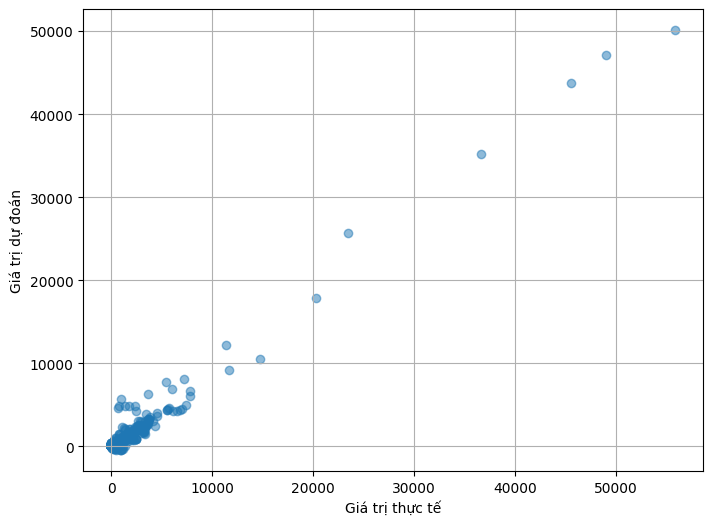

In [63]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(y_couple_test, predicted_values, alpha=0.5)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.grid(True)
plt.show()